In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input, Add, LeakyReLU
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.applications import ResNet50, InceptionV3
from tensorflow.keras.applications import EfficientNetB0, DenseNet121

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
path = '/kaggle/input/affectnet-6class-csv/affectnet_6class'
file = os.path.join(path, 'affectnet_6class.csv')
df = pd.read_csv(file)

# Display data info
print(df.head())
print(df.describe())
df.info()

                      pth     label    relFCs
0  anger/image0000006.jpg  surprise  0.873142
1  anger/image0000066.jpg     angry  0.843079
2  anger/image0000343.jpg     angry  0.870351
3  anger/image0000346.jpg      fear  0.857179
4  anger/image0000356.jpg       sad  0.821846
             relFCs
count  21323.000000
mean       0.797263
std        0.059010
min        0.516357
25%        0.764179
50%        0.806939
75%        0.840265
max        0.899951
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21323 entries, 0 to 21322
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pth     21323 non-null  object 
 1   label   21323 non-null  object 
 2   relFCs  21323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 499.9+ KB


In [3]:
df.hist

<bound method hist_frame of                              pth     label    relFCs
0         anger/image0000006.jpg  surprise  0.873142
1         anger/image0000066.jpg     angry  0.843079
2         anger/image0000343.jpg     angry  0.870351
3         anger/image0000346.jpg      fear  0.857179
4         anger/image0000356.jpg       sad  0.821846
...                          ...       ...       ...
21318  surprise/image0034960.jpg  surprise  0.825263
21319  surprise/image0034961.jpg  surprise  0.738646
21320  surprise/image0034966.jpg  surprise  0.774524
21321  surprise/image0034973.jpg   neutral  0.766952
21322  surprise/image0042075.jpg     angry  0.832160

[21323 rows x 3 columns]>

In [4]:
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)

In [5]:
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/happy")
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/sad")
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/surprise")
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/angry")
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/fear")
countFile("/kaggle/input/affectnet-6class-csv/affectnet_6class/neutral")

Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/happy is  5044
Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/sad is  3091
Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/surprise is  4039
Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/angry is  2477
Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/fear is  3176
Number of files in directory /kaggle/input/affectnet-6class-csv/affectnet_6class/neutral is  5126


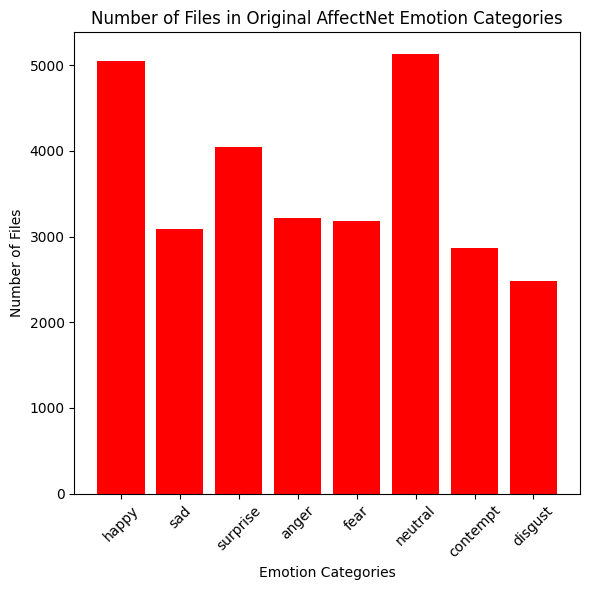

In [16]:
import os
import matplotlib.pyplot as plt

path = '/kaggle/input/affectnet-training-data'
# List of categories (folders)
categories = ['happy', 'sad', 'surprise', 'anger', 'fear', 'neutral', 'contempt', 'disgust']

# Count the number of files in each category folder
file_counts = []
for category in categories:
    category_path = os.path.join(path, category)
    if os.path.exists(category_path) and os.path.isdir(category_path):
        count = len(os.listdir(category_path))
        file_counts.append(count)
    else:
        file_counts.append(0)  # If a folder is missing or empty, add 0

# Create bar chart
plt.figure(figsize=(6, 6))
plt.bar(categories, file_counts, color='red')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in Original AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


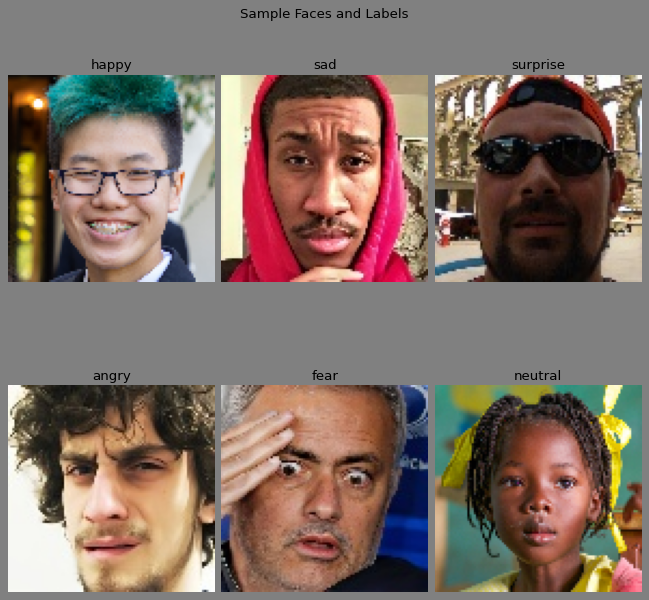

In [7]:
import random
import cv2
import matplotlib.pyplot as plt
import os

# Define the path to the organized dataset with 6 classes
base_path = '/kaggle/input/affectnet-6class-csv/affectnet_6class'

# Define the list of 6 categories
categories = ['happy', 'sad', 'surprise', 'angry', 'fear', 'neutral']

# Set up the plot for displaying images
fig, axs = plt.subplots(2, 3, sharey=True, constrained_layout=True, 
                        figsize=(8, 8), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

# Display one random image from each of the 6 categories
for i, category in enumerate(categories):
    # Set the category path and list images
    category_path = os.path.join(base_path, category)
    images = os.listdir(category_path)
    
    # Randomly select an image from the category folder
    img_name = random.choice(images)
    img_path = os.path.join(category_path, img_name)
    
    # Read and process the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with its label
    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')

# Show the plot
plt.show()


In [8]:
# how many emotions categories

import os

INPUT_PATH = "/kaggle/input/affectnet-6class-csv/affectnet_6class"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)

print(EMOTIONS)

['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']


In [9]:
import cv2
import numpy as np
from keras.utils import to_categorical
import os

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y))
    return X, y

In [10]:
# Load the images
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
#input_shape = (96,96,1)

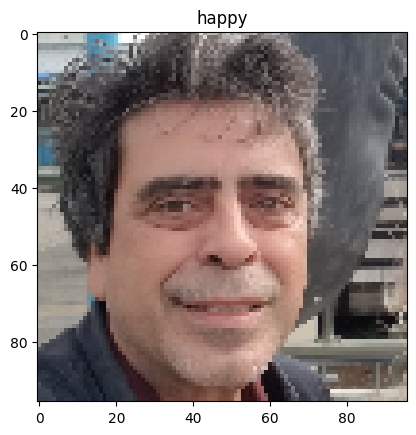

In [11]:
import matplotlib.pyplot as plt

# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(EMOTIONS[np.argmax(y[idx])])
plt.show()

In [12]:
# Train test split pre-processed data

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(64, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.4))

model_4.add(Conv2D(128, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(256, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(256, (3,3), activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.6))

model_4.add(Flatten())
model_4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(6, activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,299,206 (4.96 MB)

 Trainable params: 1,297,094 (4.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [14]:
# Compile the model
model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])  # learning_rate: 0.001

# Train the model
history = model_4.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=128,
                    callbacks=[EarlyStopping(patience=5, monitor='val_loss'),
                               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)])

Epoch 1/100


I0000 00:00:1733195121.678868     102 service.cc:145] XLA service 0x79df0400e6e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733195121.678935     102 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/144 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1381 - loss: 5.1490 

I0000 00:00:1733195134.746955     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - accuracy: 0.1926 - loss: 4.9154 - val_accuracy: 0.2376 - val_loss: 3.9023 - learning_rate: 1.0000e-04
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.2681 - loss: 4.4028 - val_accuracy: 0.3117 - val_loss: 3.5401 - learning_rate: 1.0000e-04
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3224 - loss: 3.9630 - val_accuracy: 0.3720 - val_loss: 3.2815 - learning_rate: 1.0000e-04
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3570 - loss: 3.6909 - val_accuracy: 0.4023 - val_loss: 3.1467 - learning_rate: 1.0000e-04
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3752 - loss: 3.4686 - val_accuracy: 0.4389 - val_loss: 3.0165 - learning_rate: 1.0000e-04
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3821 - loss: 3.3349 - val_accuracy: 0.4901 - val_loss: 2.8809 - learning_rate: 1.0000e-04
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


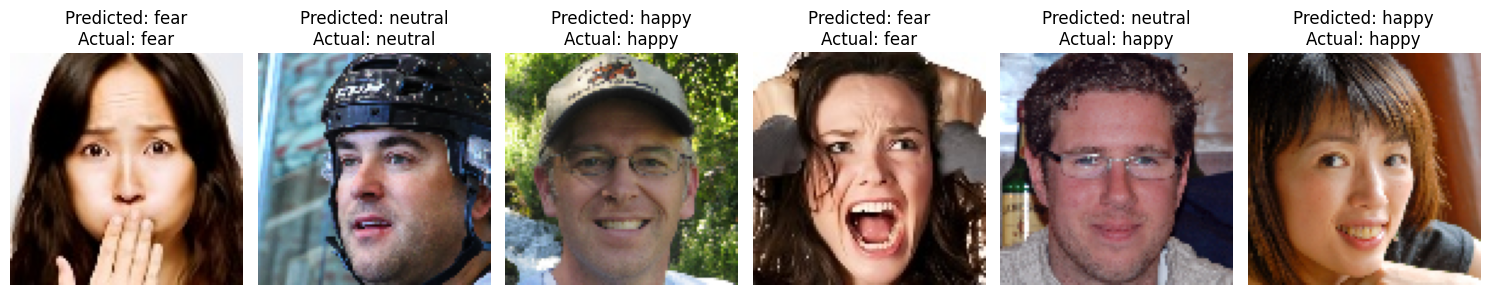

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Select 6 random test samples
num_samples = 6
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

# Make predictions on the selected test samples
y_pred = model_4.predict(X_test[random_indices])
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test[random_indices], axis=1)

# Class labels
class_labels = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']

# Plot the results
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[random_indices[i]].astype('uint8'))  # Display the image
    ax.set_title(f"Predicted: {class_labels[predicted_classes[i]]}\nActual: {class_labels[true_classes[i]]}")
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7461 - loss: 0.6842
Test Accuracy: 74.17%


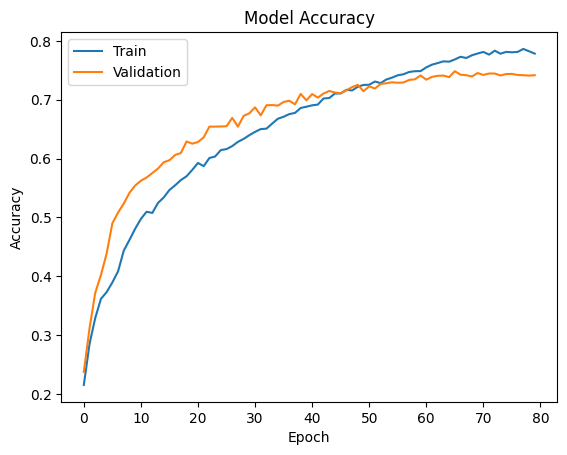

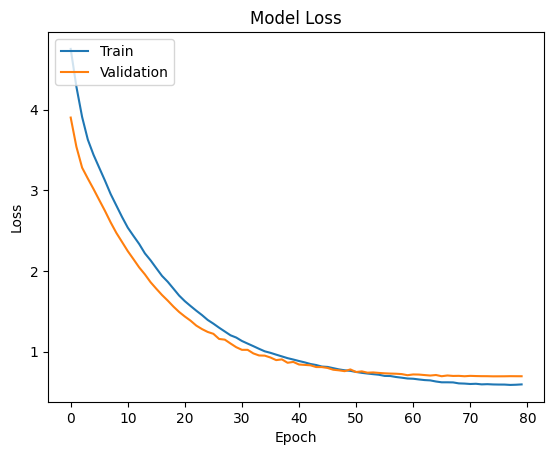

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from model_4 on the test set
predictions = model_4.predict(X_test)

# Convert the probability predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=EMOTIONS)
print("Classification Report:\n")
print(report)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:

              precision    recall  f1-score   support

    surprise       0.60      0.68      0.64       778
        fear       0.64      0.45      0.53       662
       angry       0.63      0.68      0.65       499
     neutral       0.88      0.89      0.89       999
         sad       0.62      0.67      0.64       636
       happy       0.92      0.91      0.92      1017

    accuracy                           0.74      4591
   macro avg       0.71      0.71      0.71      4591
weighted avg       0.74      0.74      0.74      4591



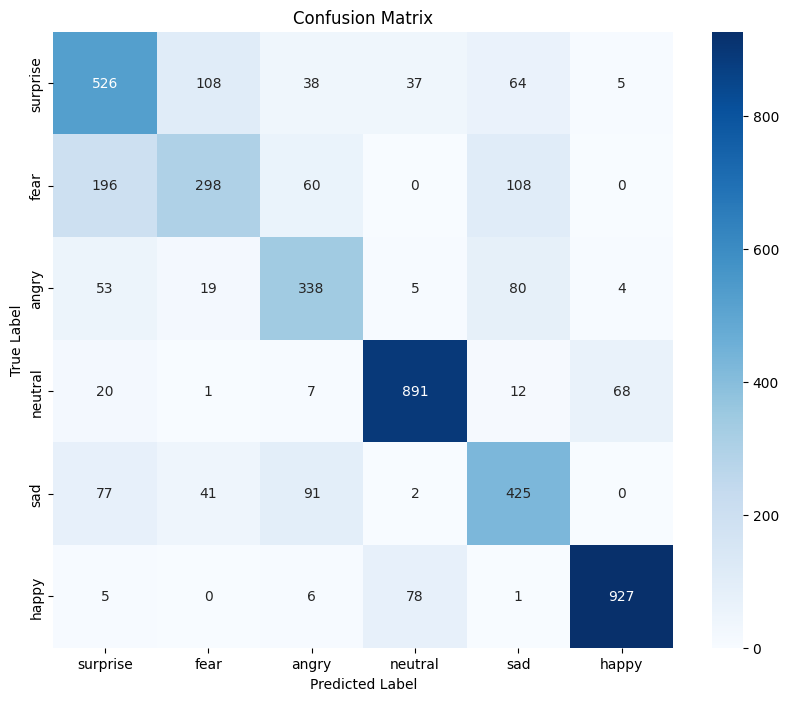

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


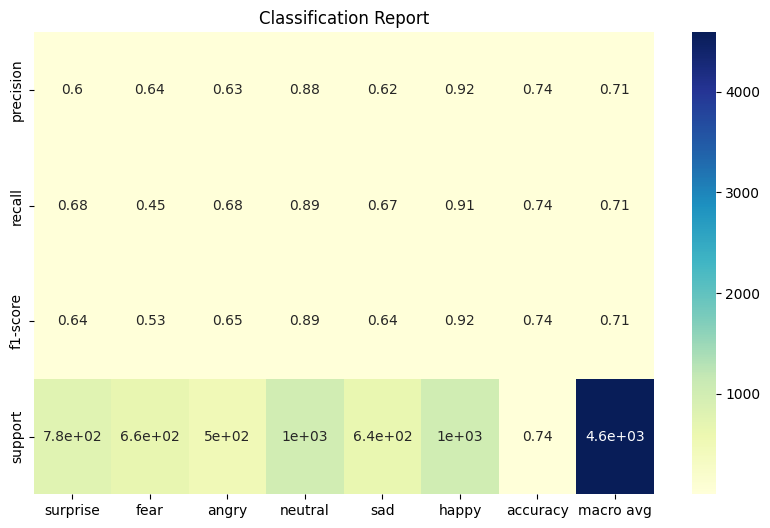

In [20]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(true_labels, predicted_labels, target_names=EMOTIONS, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()


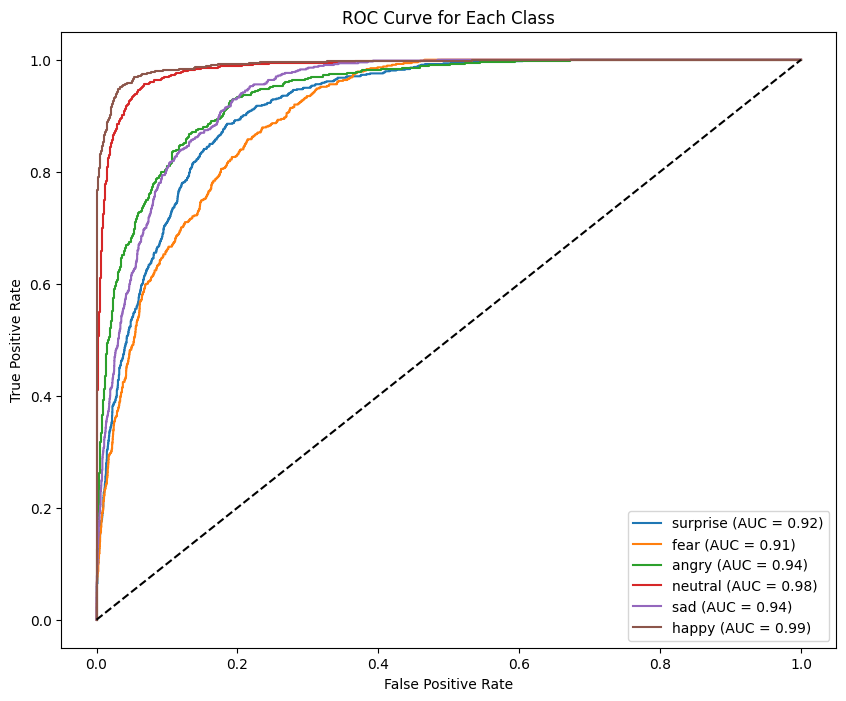

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC curve
y_test_bin = label_binarize(true_labels, classes=range(len(EMOTIONS)))
n_classes = len(EMOTIONS)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{EMOTIONS[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


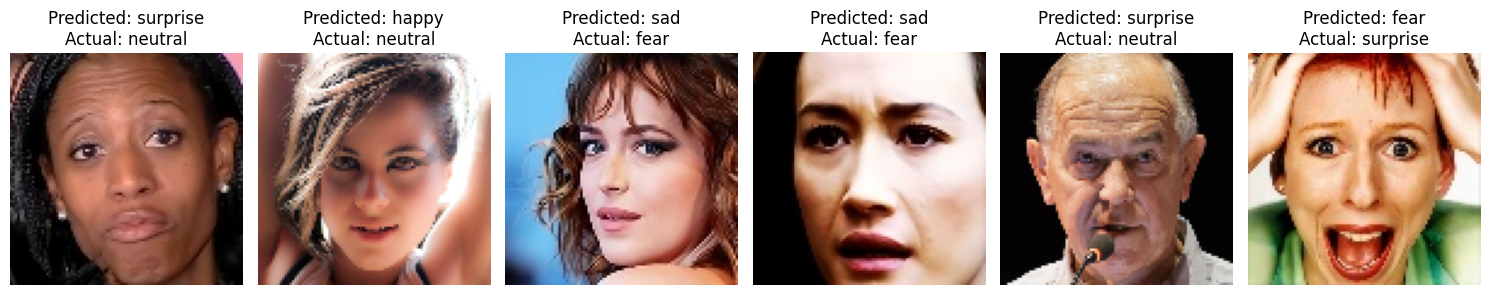

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the classes for the entire test set
y_pred = model_4.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Find indices where the predictions are wrong (misclassified)
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Randomly select a few misclassified examples
num_samples = 6  # You can change this number to display more/less misclassified images
if len(misclassified_indices) > 0:
    random_indices = np.random.choice(misclassified_indices, num_samples, replace=False)

    # Class labels
    class_labels = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']

    # Plot the misclassified images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(X_test[random_indices[i]].astype('uint8'))  # Display the image
        ax.set_title(f"Predicted: {class_labels[predicted_classes[random_indices[i]]]}\n"
                     f"Actual: {class_labels[true_classes[random_indices[i]]]}")
        ax.axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found!")




In [23]:
# Save the model to a file
model_4.save('my_model.h5')



In [24]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from IPython.display import display

# Define the path to the saved model and load it
model_path = "/kaggle/working/my_model.h5"  # or "/kaggle/working/model_4.keras"
model_4_loaded = load_model(model_path)
print("Model loaded successfully.")



Model loaded successfully.


In [25]:

model_4_loaded

<Sequential name=sequential, built=True>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


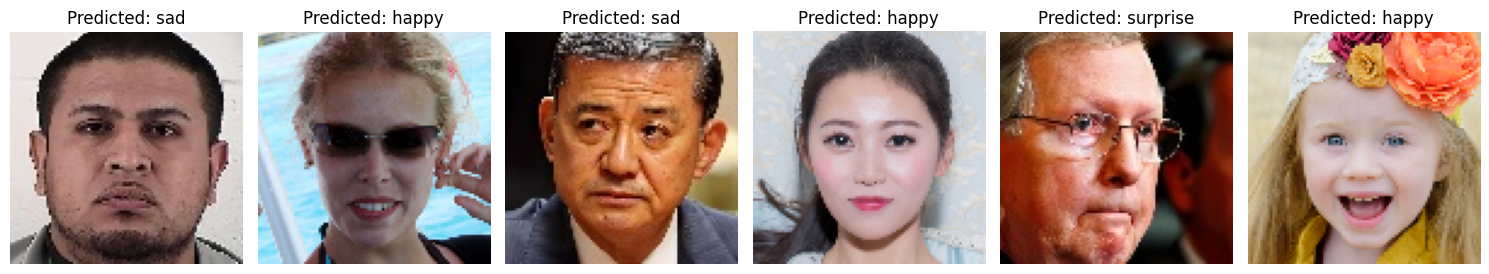

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of images you want to predict and display
num_images = 6

# Randomly select indices from the test set (ensure no index is repeated)
selected_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Select the specific images from the test set using the randomly chosen indices
selected_images = X_test[selected_indices]

# Make predictions for the selected images
predictions = model_4.predict(selected_images)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Class labels (replace with your actual class names)
class_labels = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']

# Plot and show the selected images with their predicted labels
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i].astype('uint8'))  # Display the image
    ax.set_title(f"Predicted: {class_labels[predicted_classes[i]]}")
    ax.axis('off')  # Hide the axis for better visualization

plt.tight_layout()
plt.show()


In [27]:
!pip install mtcnn

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.7 MB/s eta 0:00:0000:01


In [28]:
from mtcnn import MTCNN
import cv2
import numpy as np

# Define your 6 emotion labels
EMOTIONS = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']

def detect_faces_emo(image_path, detection_confidence=0.99, min_face_size=10):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Create an MTCNN detector instance
    detector = MTCNN()

    # Use the detector to detect faces in the image
    faces = detector.detect_faces(image)

    # Loop over the detected faces
    for face in faces:
        # Check the confidence score of the detection
        if face['confidence'] < detection_confidence:
            continue
        
        # Extract the bounding box coordinates
        x, y, width, height = face['box']
        # Check the size of the bounding box
        if min(width, height) < min_face_size:
            continue
        
        # Extract the face region from the image
        face_image = image[y:y+height, x:x+width]
        # Resize the face image to 96x96
        face_image_resized = cv2.resize(face_image, (96, 96))
        # Reshape the face image to match the input shape of the model
        face_image_reshaped = face_image_resized.reshape((1, 96, 96, 3))
        
        # Use the model to predict the emotion of the face
        predicted_emo = model_4.predict(face_image_reshaped)[0]
        # Sort the predictions in descending order of probability
        predicted_emo_sorted = sorted(list(enumerate(predicted_emo)), key=lambda x: x[1], reverse=True)
        
        # Draw the predicted emotion label on the rectangle around the face with smaller font
        label = EMOTIONS[np.argmax(predicted_emo)]
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        
        # Draw a square rectangle around the face
        face_size = min(width, height)
        x_center = x + int(width / 2)
        y_center = y + int(height / 2)
        x1 = x_center - int(face_size / 2)
        y1 = y_center - int(face_size / 2)
        x2 = x_center + int(face_size / 2)
        y2 = y_center + int(face_size / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (127, 255, 0), 2)

        # Draw a vertical table with the predicted emotion probabilities with smaller text
        table_x, table_y = x1, y2 + 20
        for index, prob in predicted_emo_sorted:
            table_y += 30  # Adjusted vertical space between rows
            emotion = EMOTIONS[index]
            cv2.putText(image, emotion, (table_x, table_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            cv2.putText(image, "{}%".format(round(prob * 100)), (table_x + 250, table_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Save the image with the detected faces and predicted emotions to a file
    cv2.imwrite("detected_faces_smaller_text.jpg", image)

    # Return the path to the saved file
    return "detected_faces_smaller_text.jpg"




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


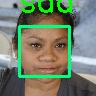

In [29]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/affectnet-6class-csv/affectnet_6class/neutral/ffhq_1.png')
# Display the saved image
Image(filename=image_path)

In [30]:
from keras.models import clone_model

In [31]:
from keras.models import clone_model
from keras.optimizers import Adam
import cv2

# Assuming model_4 is already defined and trained
# Clone the original model
model_2 = clone_model(model_4)
model_3 = clone_model(model_4)

# Compile the models
model_2.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# You can now proceed to train the models with different configurations
model_2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=128)
model_3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)  # Smaller batch size

# After training, you can use the models in an ensemble
models = [model_4, model_2, model_3]


Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.2305 - loss: 4.5503 - val_accuracy: 0.3267 - val_loss: 3.3644
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3490 - loss: 3.5565 - val_accuracy: 0.4572 - val_loss: 2.9101
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.4008 - loss: 3.0364 - val_accuracy: 0.4829 - val_loss: 2.5414
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.4639 - loss: 2.6219 - val_accuracy: 0.5221 - val_loss: 2.2122
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5006 - loss: 2.3169 - val_accuracy: 0.5652 - val_loss: 1.9199
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5204 - loss: 2.0357 - val_accuracy: 0.5679 - val_loss: 1.7286
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5465 - loss: 1.8414 - val_accuracy: 0.5968 - val_loss: 1.5189
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5605 - loss: 1.6431 -

In [32]:
import numpy as np

def ensemble_predict(models, X_test):
    # Get the predictions from each model
    preds = [model.predict(X_test) for model in models]
    
    # Stack the predictions into an array (num_models x num_samples x num_classes)
    preds_stacked = np.stack(preds, axis=0)
    
    # Average the predictions across all models (axis=0)
    avg_preds = np.mean(preds_stacked, axis=0)
    
    # Return the class with the highest average probability
    return np.argmax(avg_preds, axis=1)


In [33]:
models = [model_4, model_2, model_3]
y_pred_ensemble = ensemble_predict(models, X_test)

# Calculate accuracy or use the predicted values as needed
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy * 100:.2f}%')


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Ensemble Accuracy: 75.84%


In [34]:
def ensemble_predict_single(models, image):
    # Preprocess the image to fit the model input shape (resizing, reshaping)
    image_resized = cv2.resize(image, (96, 96))  # Adjust the size as per your model
    image_reshaped = image_resized.reshape((1, 96, 96, 3))  # Add batch dimension

    # Predict using the ensemble
    preds = ensemble_predict(models, image_reshaped)

    return preds

# Usage example for a single image
models = [model_4, model_2, model_3]
image_path = "/kaggle/input/affectnet-6class-csv/affectnet_6class/surprise/ffhq_149.png"
image = cv2.imread(image_path)

# Predict with the ensemble
pred = ensemble_predict_single(models, image)
print(f"Predicted class: {EMOTIONS[pred[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted class: surprise


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Actual Emotion: surprise

Top 6 Predicted Emotions with Probabilities:
fear: 87.3%
surprise: 12.68%
sad: 0.01%
angry: 0.01%
neutral: 0.0%
happy: 0.0%


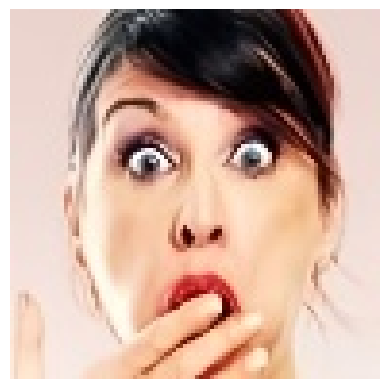

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Function to get the predicted emotion using ensemble voting
def ensemble_predict(models, X_test):
    # Get the predictions from each model
    preds = [model.predict(X_test) for model in models]
    
    # Stack the predictions into an array (num_models x num_samples x num_classes)
    preds_stacked = np.stack(preds, axis=0)
    
    # Average the predictions across all models (axis=0)
    avg_preds = np.mean(preds_stacked, axis=0)
    
    # Return the class with the highest average probability (make sure the result is an integer)
    return avg_preds  # Return probabilities for all 6 classes

# Function to predict a single image and display top 6 predictions
def ensemble_predict_single(models, image):
    # Preprocess the image to fit the model input shape (resizing, reshaping)
    image_resized = cv2.resize(image, (96, 96))  # Adjust the size as per your model
    image_reshaped = image_resized.reshape((1, 96, 96, 3))  # Add batch dimension

    # Predict using the ensemble
    preds = ensemble_predict(models, image_reshaped)

    return preds

# Function to display top 6 emotion predictions with probabilities and actual label
def display_predictions(image_path, models, true_label):
    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image could not be loaded. Check the image path.")
        return

    # Predict with the ensemble
    preds = ensemble_predict_single(models, image)
    
    # Convert true_label from one-hot encoding to label index (if necessary)
    actual_label = np.argmax(true_label, axis=1) if len(true_label.shape) > 1 else true_label
    actual_label = int(actual_label[0]) if isinstance(actual_label, np.ndarray) else int(actual_label)

    # Print actual emotion
    print(f"Actual Emotion: {EMOTIONS[actual_label]}")

    # Sort the predictions and display top 6 emotions with their probabilities
    sorted_preds = sorted(enumerate(preds[0]), key=lambda x: x[1], reverse=True)
    
    print("\nTop 6 Predicted Emotions with Probabilities:")
    for idx, prob in sorted_preds[:6]:
        print(f"{EMOTIONS[idx]}: {round(prob * 100, 2)}%")
    
    # Display the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage
models = [model_4, model_2, model_3]  # The ensemble models
image_path = "/kaggle/input/affectnet-6class-csv/affectnet_6class/fear/image0000915.jpg"  # Path to your image
true_label = y_test[0]  # Assuming the true label for the image
X_test_single = X_test[0:1]  # Single image for prediction

# Show image and print actual and predicted emotions
display_predictions(image_path, models, true_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


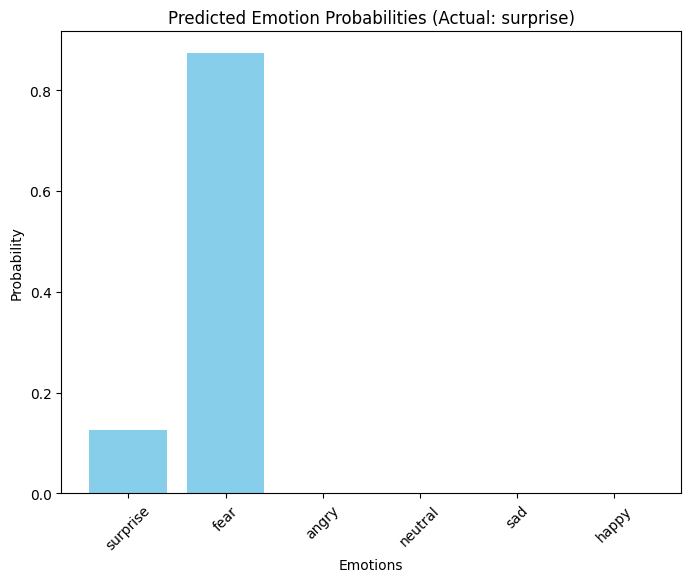

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the predicted probabilities for each emotion
def visualize_prediction_probabilities(models, image, true_label):
    # Predict with the ensemble
    preds = ensemble_predict_single(models, image)
    
    # Convert true_label from one-hot encoding to label index (if necessary)
    actual_label = np.argmax(true_label, axis=1) if len(true_label.shape) > 1 else true_label
    actual_label = int(actual_label[0]) if isinstance(actual_label, np.ndarray) else int(actual_label)
    
    # Get the emotions and their probabilities
    emotions = EMOTIONS
    probabilities = preds[0]  # The probabilities returned by the ensemble
    
    # Plotting the predicted probabilities
    plt.figure(figsize=(8, 6))
    plt.bar(emotions, probabilities, color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Probability')
    plt.title(f"Predicted Emotion Probabilities (Actual: {EMOTIONS[actual_label]})")
    plt.xticks(rotation=45)
    plt.show()

# Example usage
image_path = "/kaggle/input/affectnet-6class-csv/affectnet_6class/fear/image0000915.jpg"  # Your image path here
image = cv2.imread(image_path)
true_label = y_test[0]  # True label for the image
visualize_prediction_probabilities(models, image, true_label)


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


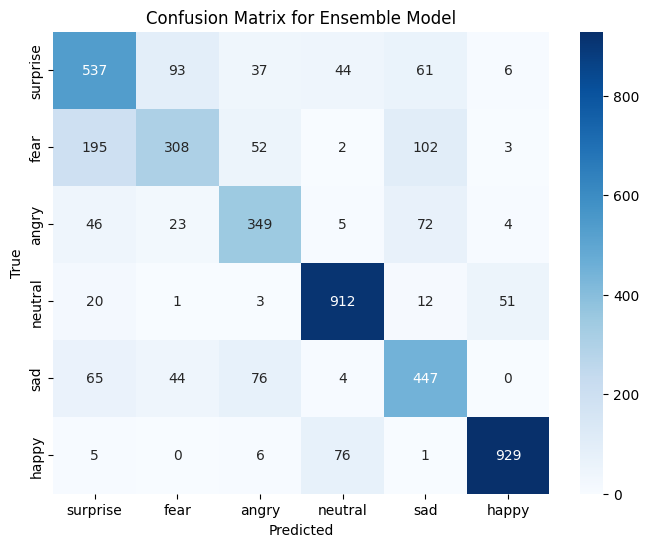

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(models, X_test, y_test, class_names):
    # Get the predicted labels for the ensemble model
    preds = ensemble_predict(models, X_test)
    predicted_labels = np.argmax(preds, axis=1)
    
    # True labels (assumed to be in one-hot encoding format, convert to integer labels)
    true_labels = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for Ensemble Model')
    plt.show()

# Example usage
class_names = EMOTIONS  # Emotion classes
plot_confusion_matrix(models, X_test, y_test, class_names)


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


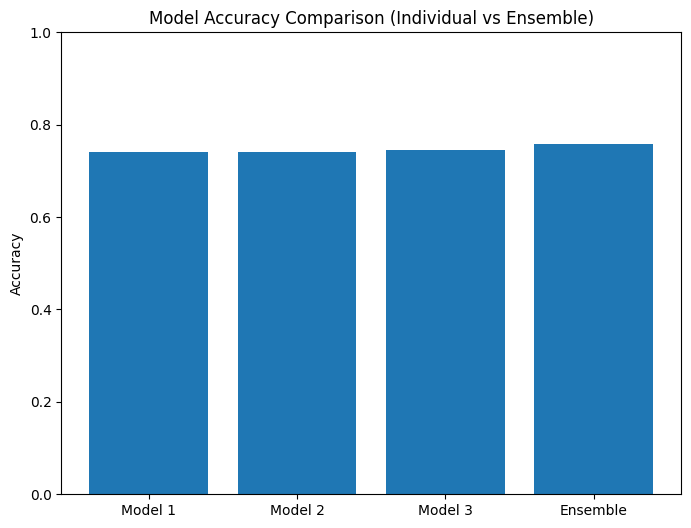

In [38]:
def plot_model_comparison(models, X_test, y_test):
    accuracies = []
    
    # Evaluate each model's performance
    for model in models:
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(accuracy)
    
    # Evaluate the ensemble model performance
    preds = ensemble_predict(models, X_test)
    ensemble_accuracy = np.mean(np.argmax(preds, axis=1) == np.argmax(y_test, axis=1))
    accuracies.append(ensemble_accuracy)
    
    # Plotting the accuracies
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(models) + 1), accuracies, tick_label=["Model 1", "Model 2", "Model 3", "Ensemble"])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison (Individual vs Ensemble)')
    plt.ylim([0, 1])
    plt.show()

# Example usage
plot_model_comparison(models, X_test, y_test)


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


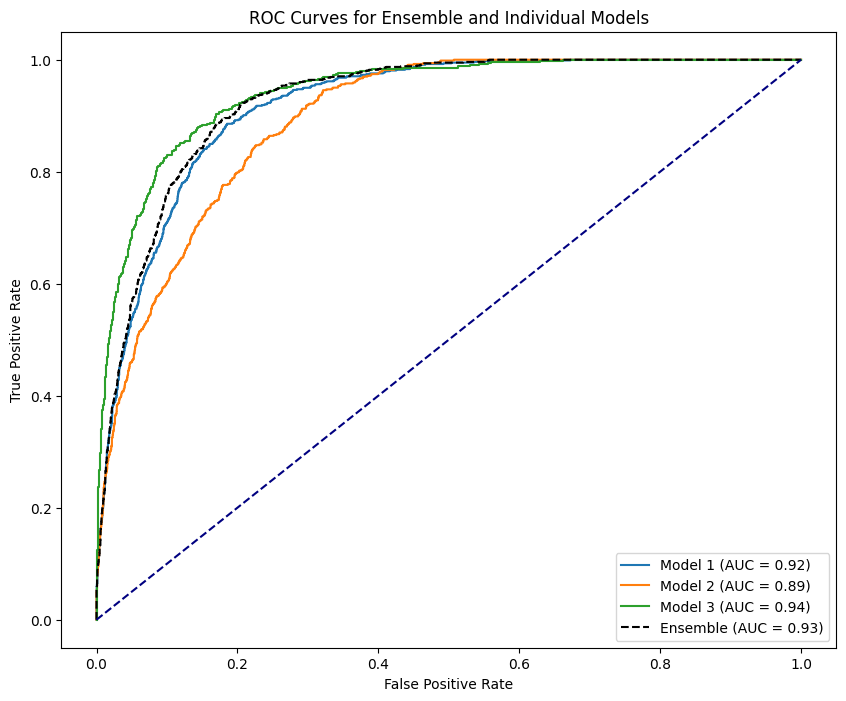

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def plot_roc_curve(models, X_test, y_test, class_names):
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)  # One-hot encode the true labels

    # Plot ROC curve for each model
    plt.figure(figsize=(10, 8))
    
    for i, model in enumerate(models):
        preds = model.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], preds[:, i])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'Model {i+1} (AUC = {roc_auc:.2f})')

    # Plot ROC curve for the ensemble model
    ensemble_preds = ensemble_predict(models, X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 0], ensemble_preds[:, 0])  # Use first class for ROC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Ensemble (AUC = {roc_auc:.2f})', linestyle='--', color='black')
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Ensemble and Individual Models')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
plot_roc_curve(models, X_test, y_test, EMOTIONS)


In [40]:
from keras.models import load_model
import numpy as np

class EnsembleModel:
    def __init__(self, models):
        self.models = models
    
    def ensemble_predict(self, X_test):
        # Get the predictions from each model
        preds = [model.predict(X_test) for model in self.models]
        
        # Convert predictions to class labels
        class_preds = [np.argmax(pred, axis=1) for pred in preds]
        
        # Perform majority voting across models
        final_preds = []
        for i in range(len(X_test)):
            votes = [class_preds[j][i] for j in range(len(self.models))]
            final_preds.append(np.bincount(votes).argmax())  # Majority voting
        
        return np.array(final_preds)
    
    def predict(self, X_test):
        return self.ensemble_predict(X_test)
    
    def save(self, file_path):
        # Save each individual model in the ensemble
        for i, model in enumerate(self.models):
            model.save(f"{file_path}_model_{i}.h5")
    
    @staticmethod
    def load(models_paths):
        # Load each model and return an EnsembleModel instance
        models = [load_model(path) for path in models_paths]
        return EnsembleModel(models)


In [41]:
# Assuming `model_4`, `model_2`, `model_3` are your trained models
models = [model_4, model_2, model_3]
ensemble_model = EnsembleModel(models)

# Save the ensemble models individually
ensemble_model.save('ensemble_model')  # This will save each model as 'ensemble_model_model_0.h5', etc.


In [42]:

# Load the models paths
models_paths = ['ensemble_model_model_0.h5', 'ensemble_model_model_1.h5', 'ensemble_model_model_2.h5']
ensemble_model = EnsembleModel.load(models_paths)

# Use the ensemble model for predictions
y_pred_ensemble = ensemble_model.predict(X_test)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [43]:
def display_predictions(image_path, models, true_label, EMOTIONS):
    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image could not be loaded. Check the image path.")
        return

    # Predict with the ensemble
    preds = ensemble_predict_single(models, image)
    
    # Convert true_label from one-hot encoding to label index (if necessary)
    # If true_label is one-hot encoded, find the class index using np.argmax
    actual_label = np.argmax(true_label, axis=-1) if len(true_label.shape) > 1 else true_label
    actual_label = int(actual_label[0]) if isinstance(actual_label, np.ndarray) else int(actual_label)

    # Print actual emotion
    print(f"Actual Emotion: {EMOTIONS[actual_label]}")

    # Display the predicted emotion
    print(f"Predicted Emotion: {EMOTIONS[preds[0]]}")
    
    # Display the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis
    plt.show()


In [44]:
# Save the ensemble models
ensemble_model.save('ensemble_model')  # This saves each model in the ensemble


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
Predicted Emotion: surprise


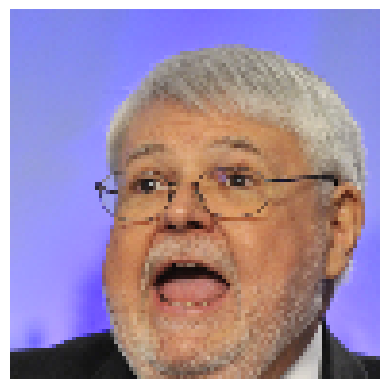

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved models
model_4 = load_model("/kaggle/working/ensemble_model_model_0.h5")
model_2 = load_model("/kaggle/working/ensemble_model_model_1.h5")
model_3 = load_model("/kaggle/working/ensemble_model_model_2.h5")

# Define the ensemble prediction functions
def ensemble_predict(models, X_test):
    # Get the predictions from each model
    preds = [model.predict(X_test) for model in models]
    
    # Stack the predictions into an array (num_models x num_samples x num_classes)
    preds_stacked = np.stack(preds, axis=0)
    
    # Average the predictions across all models (axis=0)
    avg_preds = np.mean(preds_stacked, axis=0)
    
    # Return the class with the highest average probability
    return np.argmax(avg_preds, axis=1)  # Returns class indices

def ensemble_predict_single(models, image):
    # Preprocess the image to fit the model input shape (resizing, reshaping)
    image_resized = cv2.resize(image, (96, 96))  # Adjust the size as per your model
    image_reshaped = image_resized.reshape((1, 96, 96, 3))  # Add batch dimension

    # Predict using the ensemble
    preds = ensemble_predict(models, image_reshaped)

    return preds

# Define the emotion labels
EMOTIONS = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'happy']

# Load the image for prediction
image_path = "/kaggle/input/affectnet-6class-csv/affectnet_6class/surprise/ffhq_145.png"  # Replace with your test image path
image = cv2.imread(image_path)

# Ensure the image is loaded correctly
if image is None:
    print("Error: Image could not be loaded. Check the image path.")
else:
    # Get the prediction from the ensemble
    models = [model_4, model_2, model_3]
    preds = ensemble_predict_single(models, image)

    # Get the predicted emotion class index
    predicted_class = preds[0]
    print(f"Predicted Emotion: {EMOTIONS[predicted_class]}")

    # Display the image using matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying in matplotlib
    plt.imshow(image_rgb)  # Show the image
    plt.axis('off')  # Hide the axis for better visualization
    plt.show()  # Show the plot


In [46]:
import shutil

# Create a zip file of your models
shutil.make_archive("/kaggle/working/models_archive", 'zip', '/kaggle/working', "ensemble_model_model_0.h5")
shutil.make_archive("/kaggle/working/models_archive", 'zip', '/kaggle/working', "ensemble_model_model_1.h5")
shutil.make_archive("/kaggle/working/models_archive", 'zip', '/kaggle/working', "ensemble_model_model_2.h5")



'/kaggle/working/models_archive.zip'

In [47]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from model_4 on the test set
predictions = model_2.predict(X_test)

# Convert the probability predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=EMOTIONS)
print("Classification Report:\n")
print(report)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:

              precision    recall  f1-score   support

    surprise       0.62      0.65      0.63       778
        fear       0.61      0.45      0.52       662
       angry       0.66      0.68      0.67       499
     neutral       0.86      0.91      0.89       999
         sad       0.60      0.69      0.64       636
       happy       0.93      0.90      0.92      1017

    accuracy                           0.74      4591
   macro avg       0.71      0.71      0.71      4591
weighted avg       0.74      0.74      0.74      4591



In [48]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from model_4 on the test set
predictions = model_3.predict(X_test)

# Convert the probability predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=EMOTIONS)
print("Classification Report:\n")
print(report)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:

              precision    recall  f1-score   support

    surprise       0.61      0.69      0.65       778
        fear       0.63      0.46      0.53       662
       angry       0.64      0.66      0.65       499
     neutral       0.87      0.91      0.89       999
         sad       0.63      0.66      0.64       636
       happy       0.93      0.91      0.92      1017

    accuracy                           0.75      4591
   macro avg       0.72      0.72      0.71      4591
weighted avg       0.75      0.75      0.74      4591

